In [215]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline
plt.style.use('default')
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)
import pandas.tseries
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import autocorrelation_plot
from pandas import concat
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from multiprocessing import cpu_count
import itertools
plt.style.use('fivethirtyeight') 
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


In [216]:
###RUN AGAIN AND MAKE SURE ALL THE DATA FRAME FOR THE SARMIX IS TEH SAME !!!!!!

In [217]:
#Import the data set 
MSFT = yf.Ticker('MSFT')

In [218]:
Data = MSFT.history(period='max')

In [219]:
# Define the date frame to 2010 and after 
Data= Data['2010':]

<AxesSubplot:xlabel='Date'>

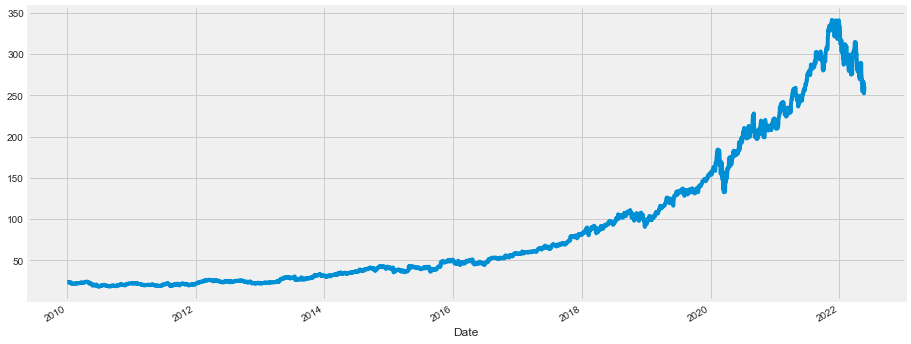

In [220]:
Data['Close'].plot(figsize=(14,6))

In [221]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3120 entries, 2010-01-04 to 2022-05-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3120 non-null   float64
 1   High          3120 non-null   float64
 2   Low           3120 non-null   float64
 3   Close         3120 non-null   float64
 4   Volume        3120 non-null   int64  
 5   Dividends     3120 non-null   float64
 6   Stock Splits  3120 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 195.0 KB


In [222]:
Data.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'],inplace=True)

In [223]:
Data 

,Close
Date,
2010-01-04,23.800226
2010-01-05,23.807913
2010-01-06,23.661806
2010-01-07,23.415731
2010-01-08,23.577221
...,...
2022-05-18,254.080002
2022-05-19,253.139999
2022-05-20,252.559998


In [224]:
Data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', name='Date', length=3120, freq=None)

In [225]:
Data = Data.resample('MS').mean()

In [226]:
#Checking for null 
print(Data.index.isnull().sum())
print(Data.isna().sum())

0
Close    0
dtype: int64


In [227]:
Data['2010':'2017']

,Close
Date,
2010-01-01,23.182605
2010-02-01,21.854470
2010-03-01,22.604842
2010-04-01,23.581515
2010-05-01,21.764608
...,...
2017-08-01,68.410399
2017-09-01,70.006066
2017-10-01,73.391322


<AxesSubplot:>

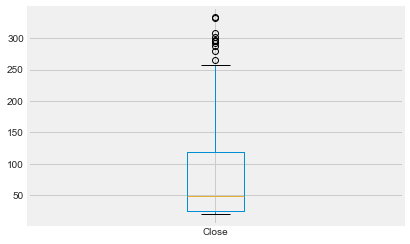

In [228]:
#Checking for outliers 
Data.boxplot()

In [229]:
data_outlier =np.log(Data)

<AxesSubplot:>

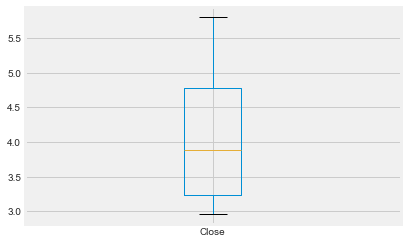

In [230]:
data_outlier.boxplot()

In [231]:
data_outlier['2013']

,Close
Date,
2013-01-01,3.116608
2013-02-01,3.137107
2013-03-01,3.157517
2013-04-01,3.217174
2013-05-01,3.349412
2013-06-01,3.372070
2013-07-01,3.343304
2013-08-01,3.312554
2013-09-01,3.316262


In [232]:
data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2010-01-01 to 2022-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   149 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [233]:
#Stationarity check
def Stationarity (TS):
    #import adfuller 
    from statsmodels.tsa.stattools import adfuller
    roll_mean = TS.rolling(window=8,center=False).mean()
    roll_std =TS.rolling(window=8,center=False).std()
    diff = TS.diff()
    #Dickey fuller test 
    dftest=adfuller(TS)

    #Plot Rolling statistics 
    fig=plt.figure(figsize=(14,6))
    orig= plt.plot(TS,color='blue',label='Original')
    mean=plt.plot(roll_mean,color='green',label='Rolling mean')
    std=plt.plot(roll_std,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation Microsoft Stock')
    plt.show(block=False)
    #print Dickey fulle test 
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
        print(dfoutput)
        return None

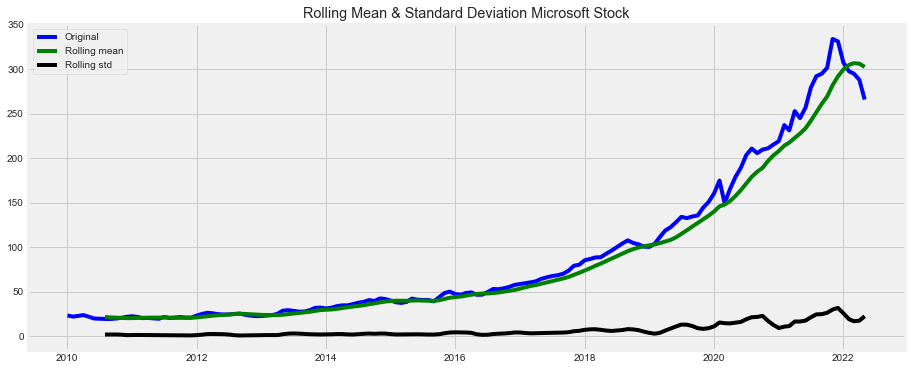

Results of Dickey-Fuller Test: 

Test Statistics                  1.911143
p-value                          0.998546
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
dtype: float64


In [234]:
Stationarity(Data)

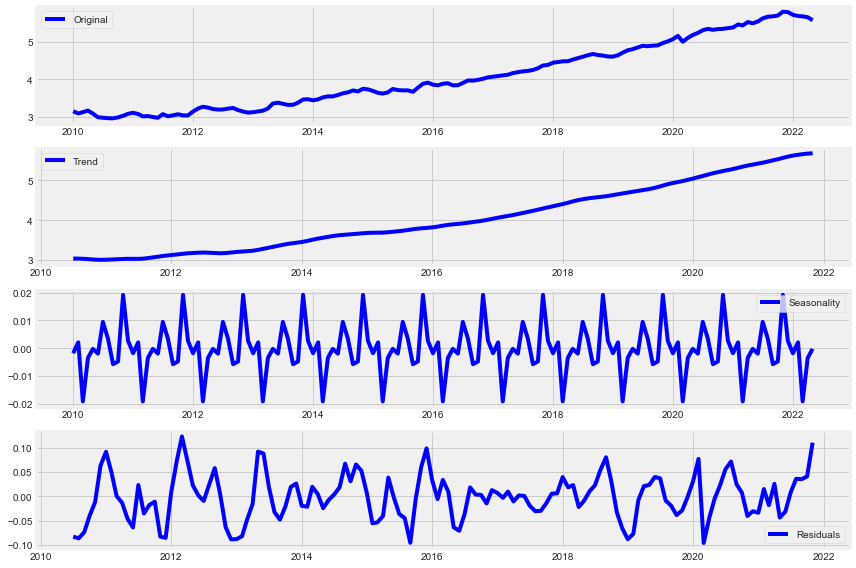

In [235]:
#decomposition...
decomposition = seasonal_decompose(np.log(Data))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(Data), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()


In [236]:
data_diff = data_outlier.diff(periods=1)

In [237]:
data_diff.dropna(inplace=True)

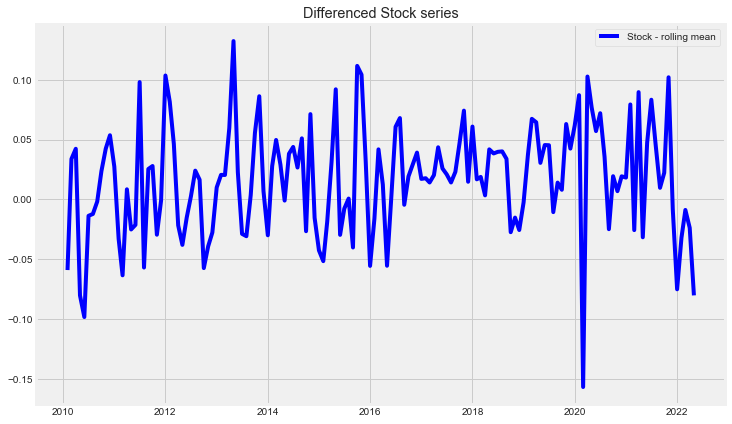

In [238]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Stock - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Stock series')
plt.show(block=False)

In [239]:
dftest = adfuller(data_diff) 

print('Results of Dickey-Fuller Test: \n')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistics               -1.014340e+01
p-value                        8.306135e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.470000e+02
Critical Value (1%)           -3.475637e+00
Critical Value (5%)           -2.881410e+00
Critical Value (10%)          -2.577365e+00
dtype: float64


In [240]:
# Predicting High prices of Apple with SARIMAX

In [241]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [242]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_outlier,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82915D+00    |proj g|=  6.94278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   2.034D-07   2.829D+00
  F =   2.8291483992199113     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =845.0862229675336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -4.30907D-01    |proj g|=  2.32030D-01

At iterate   10    f= -4.91928D-01    |proj g|=  2.92405D-01

At iterate   15    f= -4.92361D-01    |proj g|=  7.81228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     25      1     0     0   7.812D-05  -4.924D-01
  F = -0.49236111869123972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =-140.72361336998944
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.75645D+00    |proj g|=  1.09871D+00

At iterate   10    f=  1.85723D+00    |proj g|=  2.00908D-01

At iterate   15    f=  1.85007D+00    |proj g|=  1.57696D-01
  ys=-3.248E-02  -gs= 7.094E-02 BFGS update SKIPPED

At iterate   20    f=  1.56042D+00    |proj g|=  6.02038D-01

At iterate   25    f=  1.50662D+00    |proj g|=  1.18489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     59      1     1     0   1.208D-05   1.507D+00
  F =   1.5066098605900264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =454.96973

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     33      1     0     0   1.014D-04  -4.271D-01
  F = -0.42714952521957339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =-123.29055851543288
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.77982D-02    |proj g|=  2.49266D+00

At iterate    5    f= -4.71467D-01    |proj g|=  1.75942D-01

At iterate   10    f= -4.88744D-01    |proj g|=  1.36066D-0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.13180D-01    |proj g|=  6.39050D+00

At iterate   10    f= -1.05292D+00    |proj g|=  8.54972D-01

At iterate   15    f= -1.06338D+00    |proj g|=  1.79508D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     56      1     0     0   4.786D-04  -1.063D+00
  F =  -1.0634547809274257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =-308.90952471637286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f= -6.48514D-01    |proj g|=  2.80665D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     25      1     0     0   2.332D-04  -6.485D-01
  F = -0.64851422158902527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =-187.25723803352952
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11086D-01    |proj g|=  2.83614D+00

At iterate    5    f= -7.60308D-01    |proj g|=  1.87147D-01


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     77      2     0     0   2.365D-04  -8.241D-01
  F = -0.82406867231510683     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =-237.57246434990185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57791D+00    |proj g|=  6.98463D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3     20      1     0     0   1.963D-03  -1.206D+00
  F =  -1.2060177464008306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =-357.3932884274475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27308D+00    |proj g|=  2.17904D+00

At iterate    5    f= -1.27849D+00    |proj g|=  4.34853D-01

At iterate   10    f= -1.30158D+00    |proj g|=  2.37104D+00

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    5    f= -1.45658D+00    |proj g|=  1.04964D-01

At iterate   10    f= -1.45661D+00    |proj g|=  1.31725D-02

At iterate   15    f= -1.45663D+00    |proj g|=  1.24803D-01

At iterate   20    f= -1.45668D+00    |proj g|=  4.86345D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   4.701D-04  -1.457D+00
  F =  -1.4566825555799332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =-428.0914015628201
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.28858D+00    |proj g|=  5.45627D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     29      1     0     0   1.453D-05  -1.289D+00
  F =  -1.2885911692344563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-378.00016843186796
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60210D+00    |proj g|=  2.82035D-01

At iterate    5    f= -1.60215D+00    |proj g|=  7.87546D-0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.22998D+00    |proj g|=  6.08067D-01

At iterate   10    f= -1.23159D+00    |proj g|=  1.27201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     17      1     0     0   2.699D-04  -1.232D+00
  F =  -1.2315853624403752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =-363.0124380072318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25026D+00    |proj g|=  4.65996D+00

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.49694D+00    |proj g|=  1.35208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     22      1     0     0   1.352D-05  -1.497D+00
  F =  -1.4969368160824392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =-440.08717119256687
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47786D+00    |proj g|=  8.63301D-02

At iterate    5    f= -1.47810D+00    |proj g|=  3.97619D-0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.26768D+00    |proj g|=  2.52418D-02

At iterate   10    f= -1.26806D+00    |proj g|=  3.85693D-01

At iterate   15    f= -1.26825D+00    |proj g|=  3.53083D-02

At iterate   20    f= -1.26826D+00    |proj g|=  2.97656D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   6.131D-05  -1.268D+00
  F =  -1.2682617167467218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =-371.9419915905231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     88      2     0     0   1.749D-03  -1.295D+00
  F =  -1.2954779367478879     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =-378.0524251508706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65100D+00    |proj g|=  4.07519D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =-446.19856187562726
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.22396D+00    |proj g|=  3.22016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   2.999D-03  -1.224D+00
  F =  -1.2239576870969897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =-360.73939075490296
RUNNING THE L-BFGS-B CODE

           * * *

Machi


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     70      2     0     0   7.666D-04  -1.304D+00
  F =  -1.3036694701709084     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =-382.4935021109307
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03584D+00    |proj g|=  2.09561D+01

At iterate    5    f= -1.20336D+00    |proj g|=  9.83094D-01

At iterate   10    f= -1.22174D+00    |proj g|=  8.38802D-02


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -1.35564D+00    |proj g|=  1.80515D-01

At iterate   15    f= -1.39233D+00    |proj g|=  6.93117D+00

At iterate   20    f= -1.42587D+00    |proj g|=  2.38095D-01

At iterate   25    f= -1.42742D+00    |proj g|=  2.14596D-02

At iterate   30    f= -1.42744D+00    |proj g|=  9.44432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     42      1     0     0   3.036D-05  -1.427D+00
  F =  -1.4274362863752237     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =-417.37601333981667
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.25800D+00    |proj g|=  1.54953D-01

At iterate   20    f= -1.25892D+00    |proj g|=  1.36401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     32      1     0     0   8.644D-04  -1.259D+00
  F =  -1.2589196167754411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =-369.15804579908144
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.90012D-01    |proj g|=  6.73704D+0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -1.65972D+00    |proj g|=  1.79398D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     26      1     0     0   1.003D-02  -1.660D+00
  F =  -1.6597301735307393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =-488.5995917121603
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.19311D-02    |proj g|=  1.97421D+01

At iterate    5    f= -1.51736D+00    |proj g|=  5.48933D-02

 This problem is unconstrained.



At iterate    5    f= -8.34957D-01    |proj g|=  5.79644D+00

At iterate   10    f= -1.24760D+00    |proj g|=  1.18679D+00

At iterate   15    f= -1.29550D+00    |proj g|=  7.03636D-01

At iterate   20    f= -1.32294D+00    |proj g|=  2.83607D-02

At iterate   25    f= -1.32295D+00    |proj g|=  1.15114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     43      1     0     0   1.151D-03  -1.323D+00
  F =  -1.3229514800369069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =-386.23954105099824
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     60      1     0     0   1.127D-02  -1.537D+00
  F =  -1.5366907610198710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =-449.9338467839216
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30760D+00    |proj g|=  8.97045D+00

At iterate    5    f= -1.35757D+00    |proj g|=  3.60894D+00

At iterate   10    f= -1.37410D+00    |proj g|=  8.55980D-01

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =-370.52742341454626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.15841D-01    |proj g|=  6.84220D+00

At iterate    5    f= -9.94623D-01    |proj g|=  4.99546D+00

At iterate   10    f= -1.14271D+00    |proj g|=  4.27851D+00

At iterate   15    f= -1.27468D+00    |proj g|=  3.16958D-01

At iterate   20    f= -1.30165D+00    |proj g|=  1.05919D-01

At iterate   25    f= -1.30177D+00    |proj g|=  1.02656D-01

At iterate   30    f= -1.30257D+00    |proj g|=  2.53610D-02

At iterate   35    f= -1.30258D+00    |proj g|=  1.38347D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy po

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47914D+00    |proj g|=  9.49334D-02

At iterate    5    f= -1.48110D+00    |proj g|=  1.25485D-01

At iterate   10    f= -1.48111D+00    |proj g|=  7.54845D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     24      1     0     0   9.620D-04  -1.481D+00
  F =  -1.4811114160916923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =-435.3712019953242

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.27016D+00    |proj g|=  5.47013D-02

At iterate   10    f= -1.27132D+00    |proj g|=  7.07252D-01

At iterate   15    f= -1.27191D+00    |proj g|=  1.44703D-02

At iterate   20    f= -1.27192D+00    |proj g|=  1.79496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     32      1     0     0   1.078D-04  -1.272D+00
  F =  -1.2719229551936433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =-373.0330406477057
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =    

 This problem is unconstrained.



At iterate   25    f= -1.29666D+00    |proj g|=  1.00986D+00

At iterate   30    f= -1.29993D+00    |proj g|=  2.05520D-01

At iterate   35    f= -1.29999D+00    |proj g|=  1.99700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     49      1     0     0   1.997D-04  -1.300D+00
  F =  -1.2999859838862988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-379.39582319811706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.47197D+00    |proj g|=  3.75506D-02

At iterate   15    f= -1.47199D+00    |proj g|=  5.91071D-02

At iterate   20    f= -1.47201D+00    |proj g|=  1.67940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   1.679D-03  -1.472D+00
  F =  -1.4720132271276913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =-430.659941684052
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.


At iterate   10    f= -1.30438D+00    |proj g|=  3.07066D+00

At iterate   15    f= -1.31036D+00    |proj g|=  1.87936D-02

At iterate   20    f= -1.31054D+00    |proj g|=  6.10149D-03

At iterate   25    f= -1.31095D+00    |proj g|=  4.69151D-02

At iterate   30    f= -1.31139D+00    |proj g|=  4.15893D-03

At iterate   35    f= -1.31139D+00    |proj g|=  2.02916D-03
  ys=-7.226E-10  -gs= 4.099E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     94      2     1     0   1.015D-03  -1.311D+00
  F =  -1.3113924377107438     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =-382.7949464378016
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48289D+00    |proj g|=  2.91481D-01

At iterate    5    f= -1.48298D+00    |proj g|=  1.79957D-01

At iterate   10    f= -1.48336D+00    |proj g|=  1.34800D-02

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -1.47902D+00    |proj g|=  9.20475D-02

At iterate   25    f= -1.47923D+00    |proj g|=  1.59415D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     38      1     0     0   1.274D-03  -1.479D+00
  F =  -1.4792262878380480     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =-430.8094337757383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24664D+00    |proj g|=  4.11219D+00

 This problem is unconstrained.



At iterate   25    f= -1.29083D+00    |proj g|=  1.51228D+00

At iterate   30    f= -1.29596D+00    |proj g|=  3.49271D-02

At iterate   35    f= -1.29597D+00    |proj g|=  2.14568D-03

At iterate   40    f= -1.29598D+00    |proj g|=  8.18438D-03

At iterate   45    f= -1.29598D+00    |proj g|=  4.71631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     68      1     0     0   4.036D-05  -1.296D+00
  F =  -1.2959793314790686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =-376.20184078076244


In [243]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (0, 0, 0, 12)
aic       -488.599592
Name: 40, dtype: object

In [244]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data_outlier, 
                                        order=(1, 0, 1), 
                                        seasonal_order=(0,0,0,12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65966D+00    |proj g|=  2.20599D-01

At iterate    5    f= -1.65972D+00    |proj g|=  1.79398D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     26      1     0     0   1.003D-02  -1.660D+00
  F =  -1.6597301735307393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


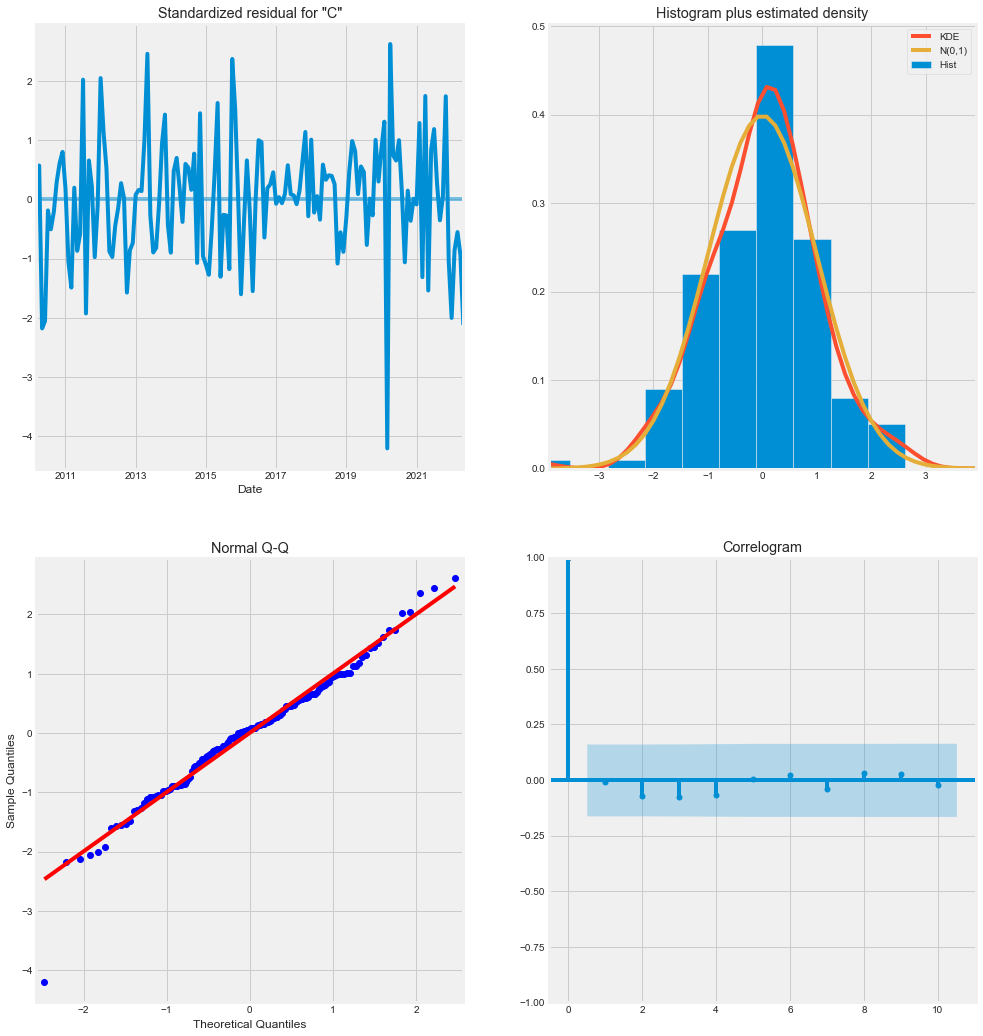

In [245]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [246]:
# Get predictions starting from 2013 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False,full_results=True)
pred_conf = pred.conf_int()

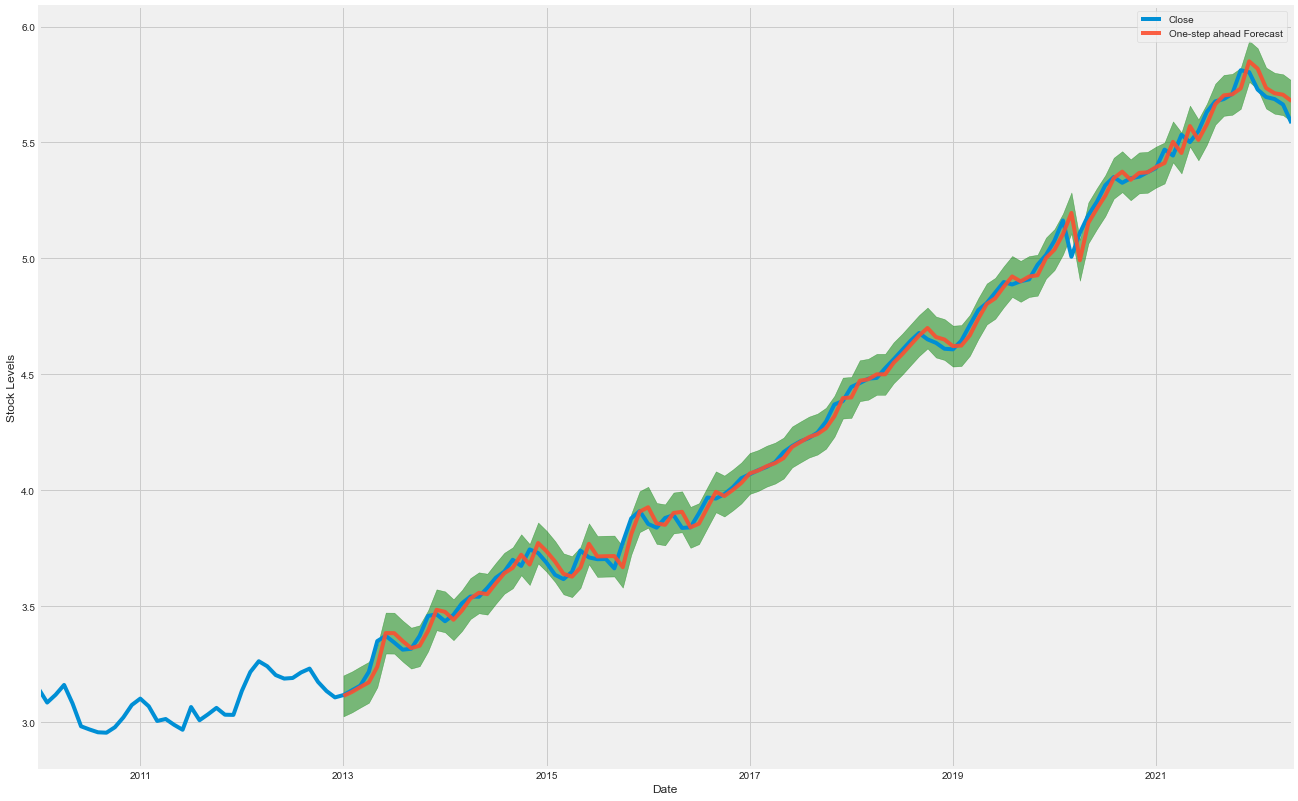

In [247]:
rcParams['figure.figsize'] = 20, 14

# Plot observed values
ax = data_outlier['2010':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Stock Levels')
plt.legend()

plt.show()

In [248]:
# Get the real and predicted values
stock_forecasted = pred.predicted_mean
stock_truth = data_outlier['2013-01-01':]['Close']

# Compute the mean square error
mse = ((stock_forecasted - stock_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 0.0


In [249]:
# Forecasting 

In [250]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

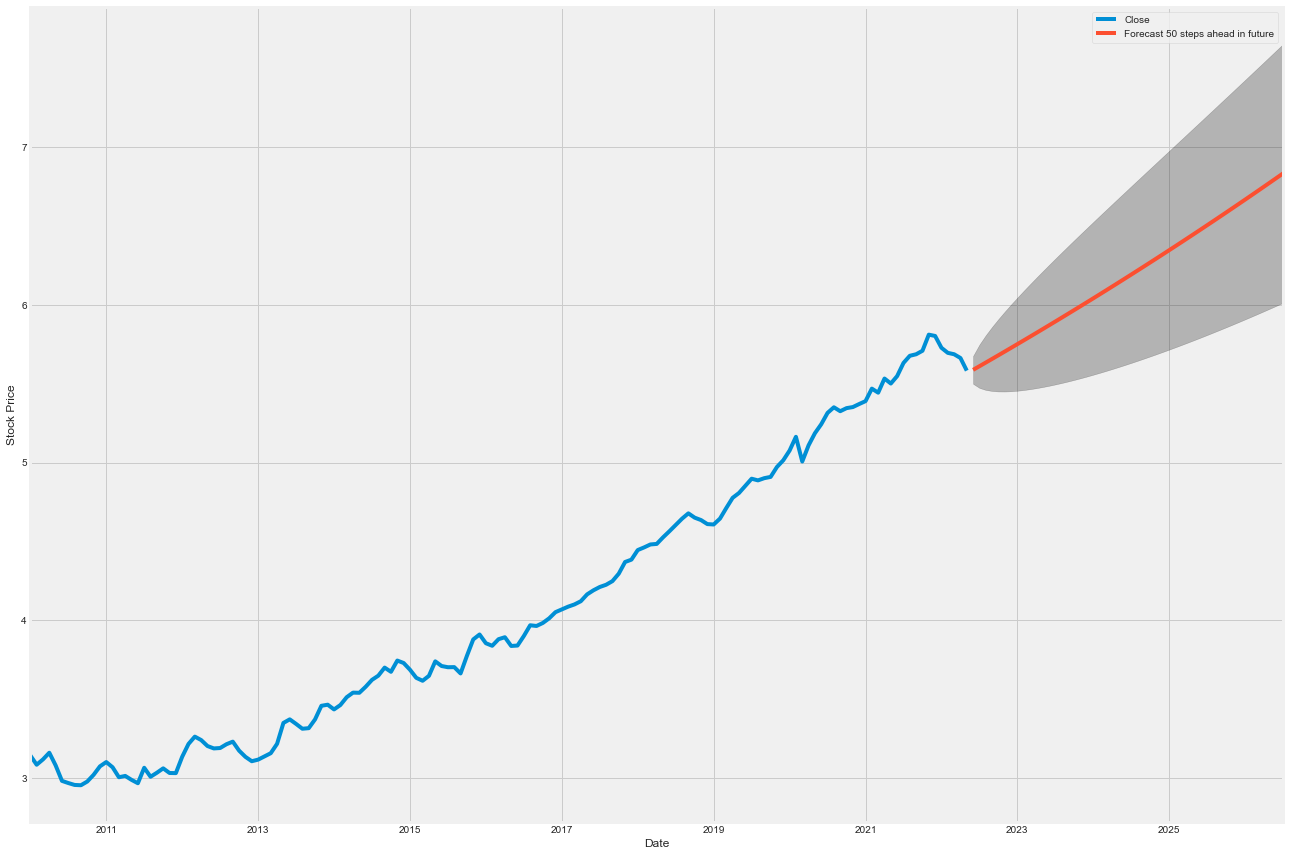

In [251]:
# Plot future predictions with confidence intervals
ax = data_outlier.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast 50 steps ahead in future')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')

plt.legend()
plt.show()